In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

Loading the data from Antoine

In [5]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [6]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just SHH group

In [8]:
shh_list = set()

for column in data.columns:
    if "SHH" in column: 
        shh_list = shh_list.union(set(data[column].replace({"":None}).dropna()))   

print(shh_list)

{'NFATC1', 'SUFU', 'ZIC1', 'DMRTA1', 'YAP1', 'NHLH1', 'LDB1', 'INSM1', 'PCNT', 'POU3F3', 'NCOR2', 'CEBPA', 'SMO', 'SOX2', 'BCOR', 'TCF12', 'GLI2', 'RARB', 'ZIC4', 'PTCH1', 'ATOH1', 'SOX13', 'TGFBR1', 'BBX', 'PDLI3', 'PBX1'}


# Creating a Network starting from All Omnipath interactions

In [26]:
shh_net = Network(shh_list, resources = resources.interactions)

Error: node DMRTA1 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node BBX is not present in the resources database
Error: node PDLI3 is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [27]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,NFATC1,O95644,NaN
1,SUFU,Q9UMX1,NaN
2,ZIC1,Q15915,NaN
3,YAP1,P46937,NaN
4,NHLH1,Q02575,NaN
5,LDB1,Q86U70,NaN
6,INSM1,Q01101,NaN
7,PCNT,O95613,NaN
8,POU3F3,P20264,NaN
9,NCOR2,Q9Y618,NaN


In [28]:
shh_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=False)

In [13]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,NFATC1,O95644,NaN
1,SUFU,Q9UMX1,NaN
2,ZIC1,Q15915,NaN
3,YAP1,P46937,NaN
4,NHLH1,Q02575,NaN
...,...,...,...
130,NOTCH3,Q9UM47,NaN
131,THRA,P10827,NaN
132,RARA,P10276,NaN
133,RXRG,P48443,NaN


In [14]:
shh_net.edges

,source,target,Type,Effect,References
0,O95644,Q9Y625,None,stimulation,21871017; 21871017
1,Q9Y625,Q13635,None,stimulation,31756413; 31756413
2,Q13635,Q99835,None,inhibition,14556242; 12192414; 14556242; 12192414
3,Q99835,Q9UMX1,None,inhibition,22114142; 22114142
4,Q9Y625,Q15465,None,stimulation,31756413; 31756413
...,...,...,...,...,...
573,O14920,O43524,None,inhibition,15084260; 19188143
574,SIGNOR-PF27,Q9UM47,None,inhibition,24749067
575,O43524,Q9UM47,None,inhibition,24749067
576,P10276,P10827,None,stimulation,15650024


In [ ]:
df_gs = shh_net.convert_edgelist_into_genesymbol()

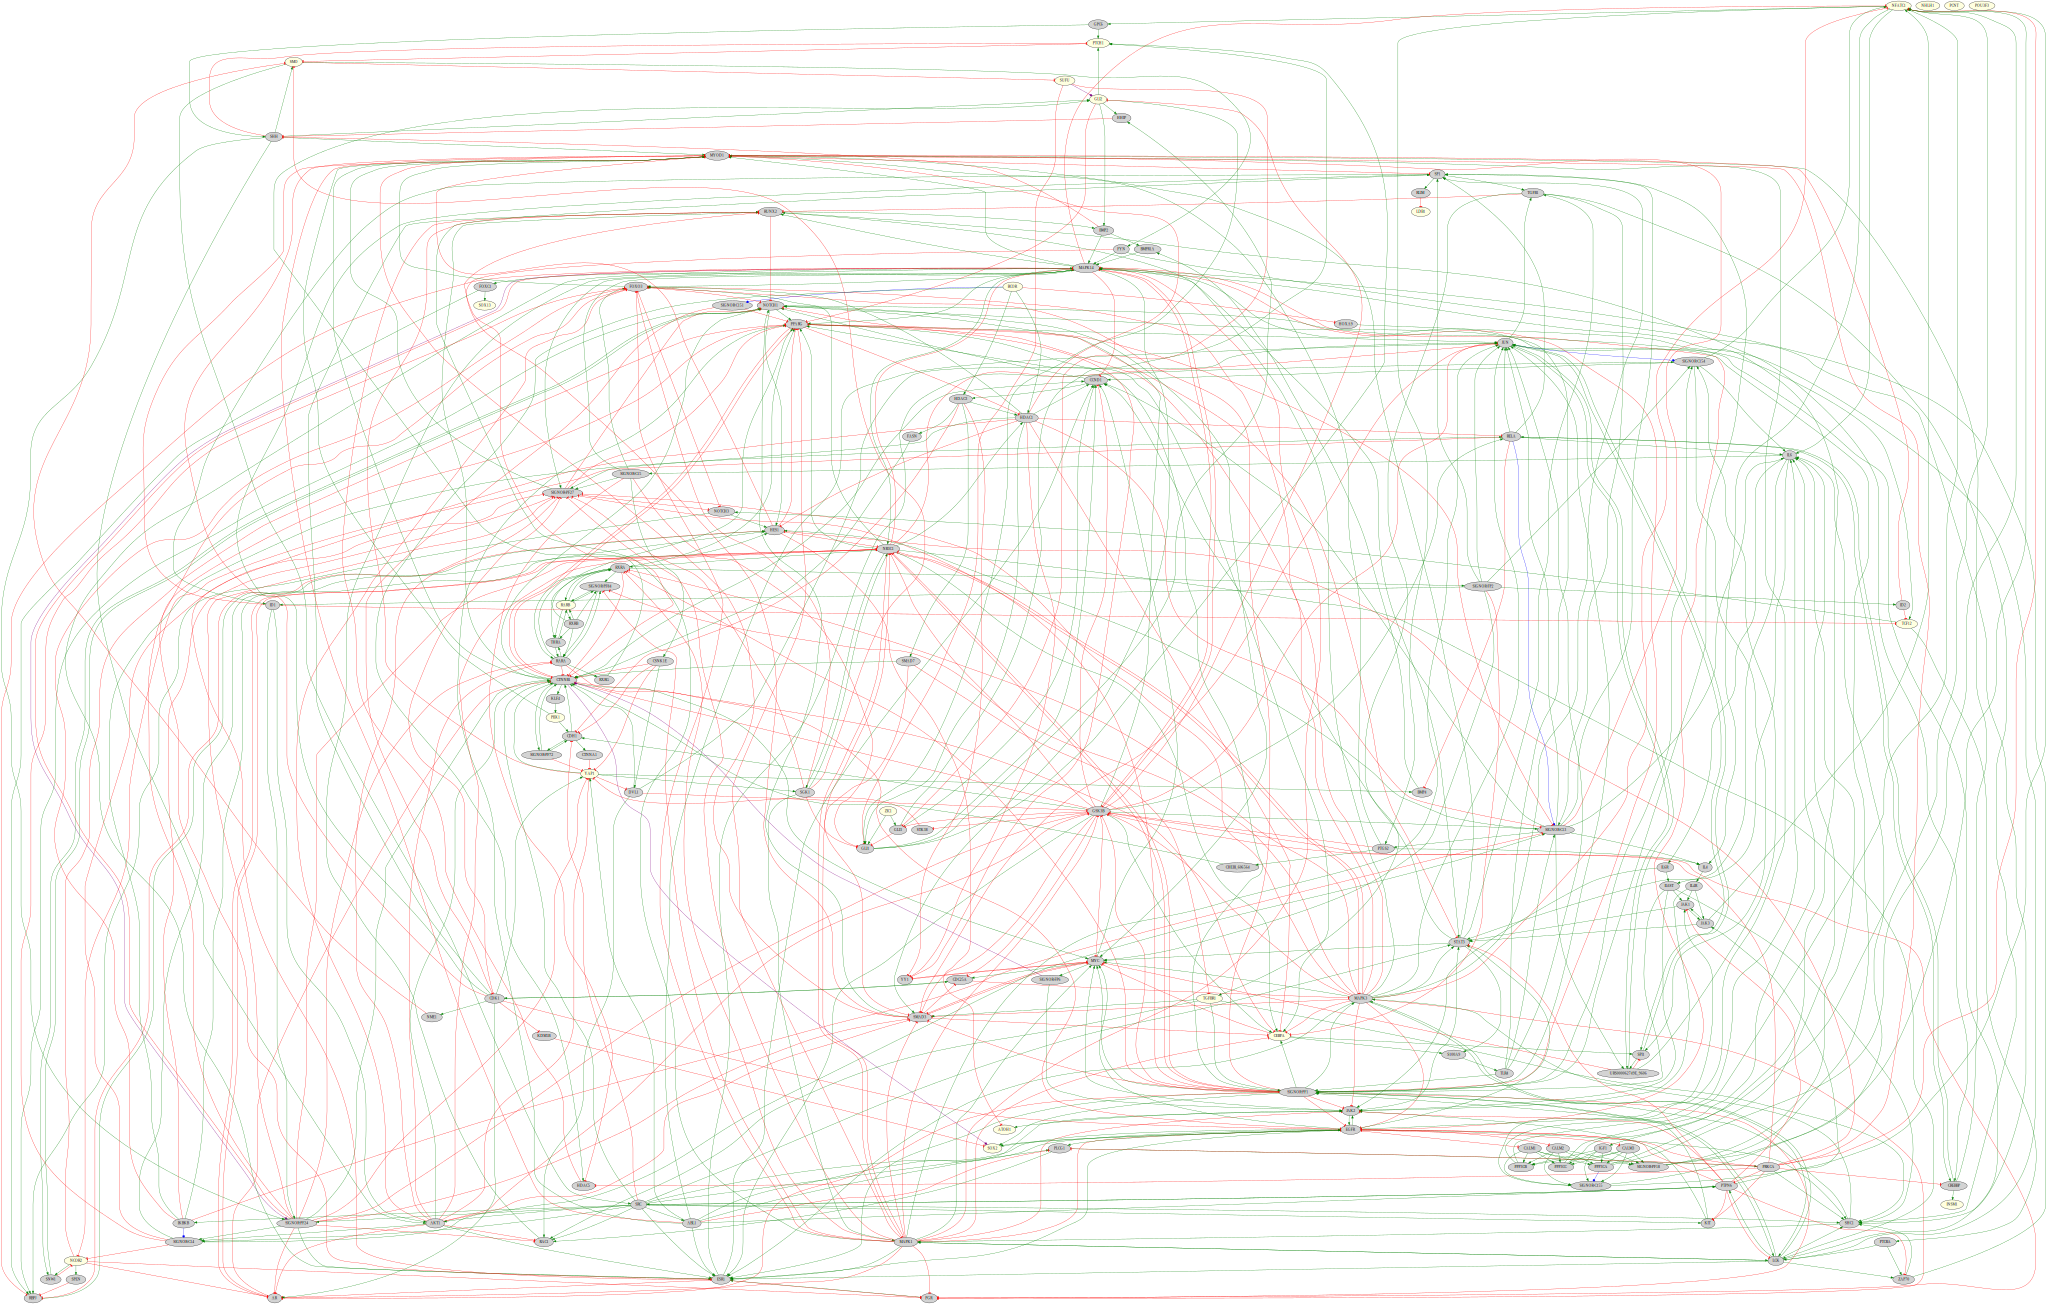

In [29]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect', noi=True)
output = figures_folder + "SHH/SHH_signor"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [ ]:
from neko._outputs.exports import Exports

In [ ]:
shh_net.remove_node("PCNT")

In [ ]:
shh_net.remove_node("POU3F3")

In [ ]:
shh_net.remove_node("NHLH1")

In [ ]:
export = Exports(shh_net)

In [ ]:
export.export_sif(sif_output + "SHH_signor.sif")